### Write a program to perform time series visualisation and basic analysis using a data indexed dataset. Plot time trends,compute a 7-day rolling average, and visualise trends using line plots. Use any public dataset such as daily COVID-19 cases,temperature, or stock prices.

• Standardize date parsing (explicit pd.to_datetime format)

• At end, include a “Key Finding” bullet list (e.g., peaks, seasonality)

• Save the final time-series plot as a high resolution PNG for slide decks

In [2]:
# IMPORT DEPENDENCIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# LOAD DATSET
url="https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"
df=pd.read_csv(url)


In [4]:
print(df)

              Date      Country  Confirmed  Recovered  Deaths
0       2020-01-22  Afghanistan          0          0       0
1       2020-01-23  Afghanistan          0          0       0
2       2020-01-24  Afghanistan          0          0       0
3       2020-01-25  Afghanistan          0          0       0
4       2020-01-26  Afghanistan          0          0       0
...            ...          ...        ...        ...     ...
161563  2022-04-12     Zimbabwe     247094          0    5460
161564  2022-04-13     Zimbabwe     247160          0    5460
161565  2022-04-14     Zimbabwe     247208          0    5462
161566  2022-04-15     Zimbabwe     247237          0    5462
161567  2022-04-16     Zimbabwe     247237          0    5462

[161568 rows x 5 columns]


In [11]:
# Step-1 : STANDARDIZE THE DATE PARSING
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')
df=df[df['Country']=='India']
df.set_index('Date',inplace=True)

In [13]:
# CALCULATE MOVING AVERAGES
df['Daily_Cases']=df['Confirmed'].diff().fillna(0)
df['7_day_Rolling_Avg']=df['Daily_Cases'].rolling(window=7).mean()

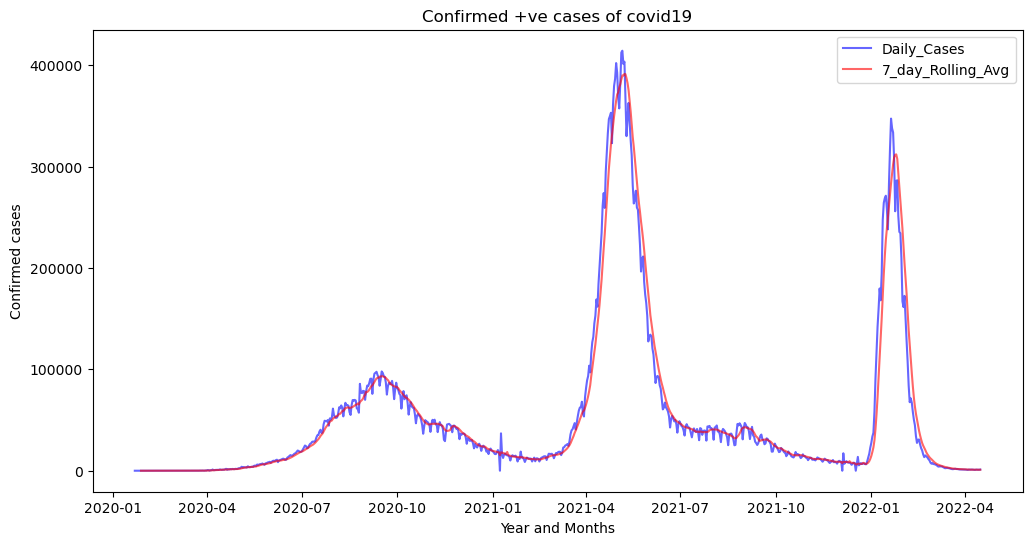

In [21]:
# PLOT TREND AND MOVING AVERAGES
plt.figure(figsize=(12,6))
plt.plot(df.index,df['Daily_Cases'],label="Daily_Cases",alpha=0.6,color='blue')
plt.plot(df.index,df['7_day_Rolling_Avg'],label="7_day_Rolling_Avg",alpha=0.6,color='red')
plt.legend()
plt.xlabel("Year and Months")
plt.title("Confirmed +ve cases of covid19")
plt.ylabel("Confirmed cases")
plt.show()